In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy import optimize
from scipy import stats
from lmfit import Model
import emcee
import corner
import os

In [2]:
files = !ls U*.txt

hora = np.array(list(open("list.txt","r")))

for i in range(len(hora)):
    hora[i] = hora[i][:-1]

print(hora)
print(files)

['Datos' 'Datos' 'Datos' 'Datos' 'Datos' 'Datos' 'Datos' 'Datos' '']
['U1.txt', 'U2.txt', 'U3.txt', 'U4.txt', 'U5.txt', 'U6.txt', 'U7.txt', 'U8.txt']


[ 2.71001900e-02  5.63642290e-01  1.05532234e+01 -7.45290879e+00
 -3.61251530e-03]


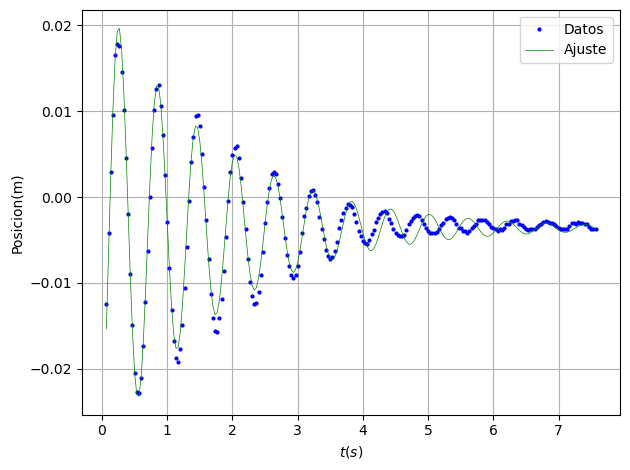

[ 0.02542187  0.54238129 10.58249813 -1.21534777]


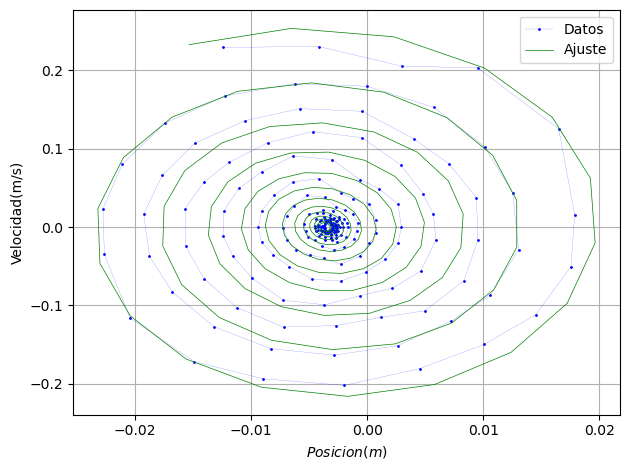

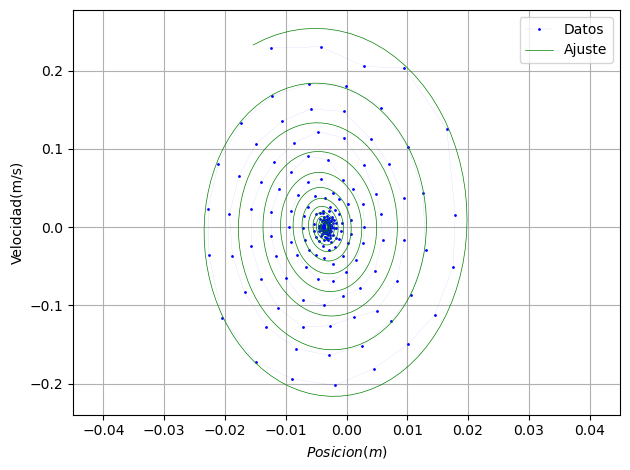

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1319.48it/s]


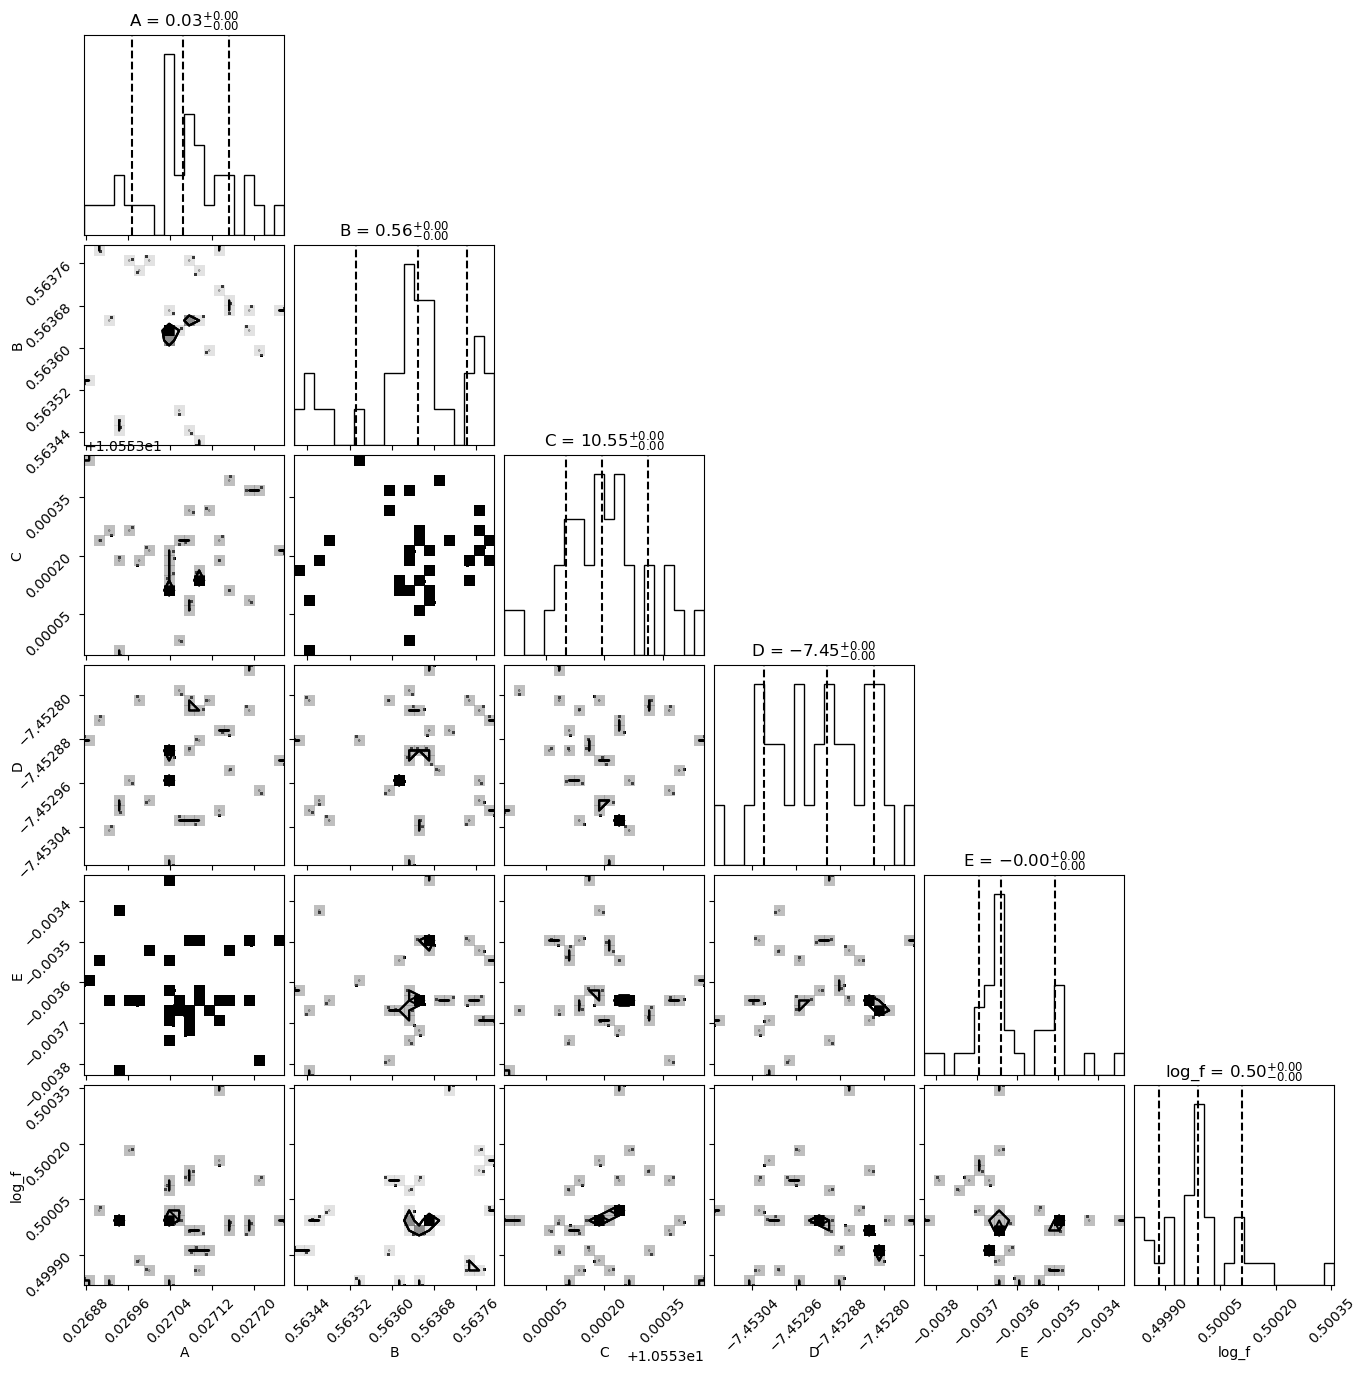

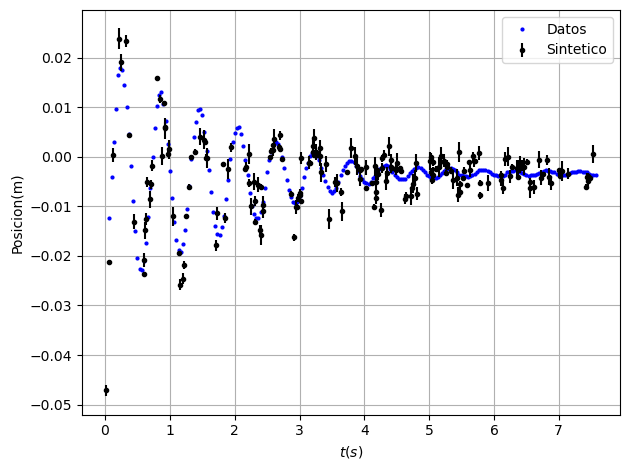

[ 5.22424239e-02  4.13983911e-01  1.04672334e+01 -3.29994102e+00
 -3.88076534e-03]


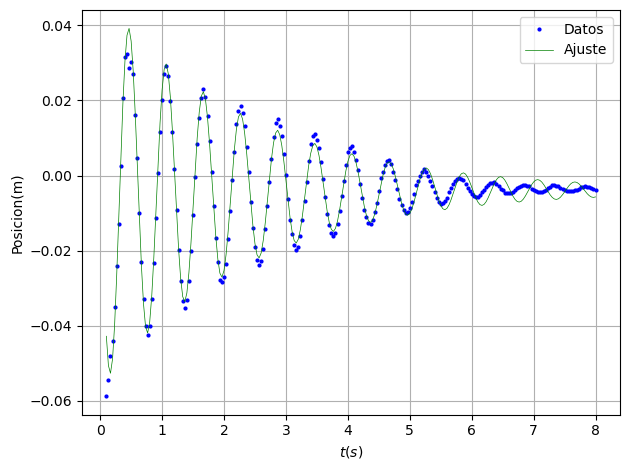

[ 0.04676029  0.38162428 10.41932968 -3.18203383]


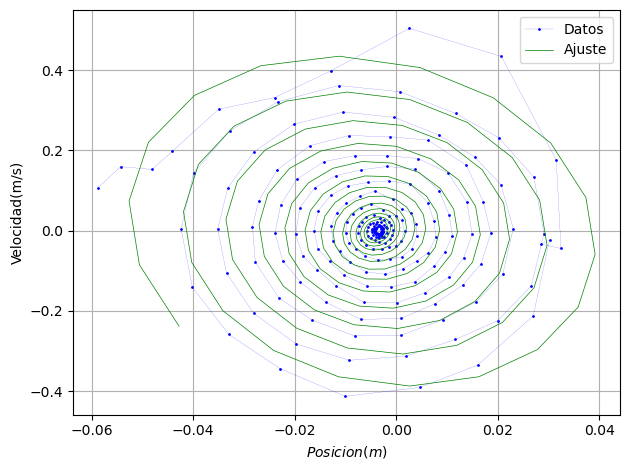

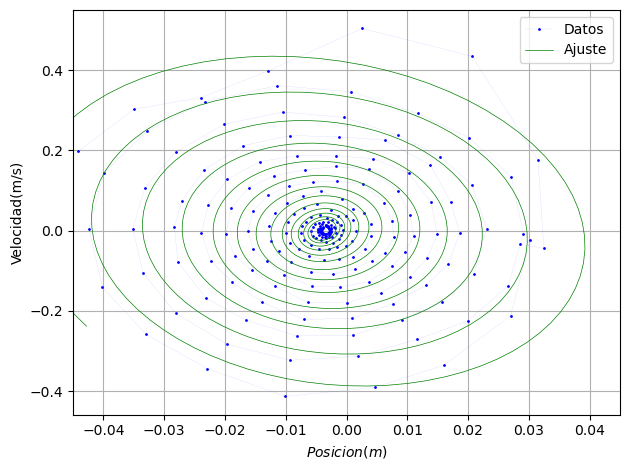

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1318.60it/s]


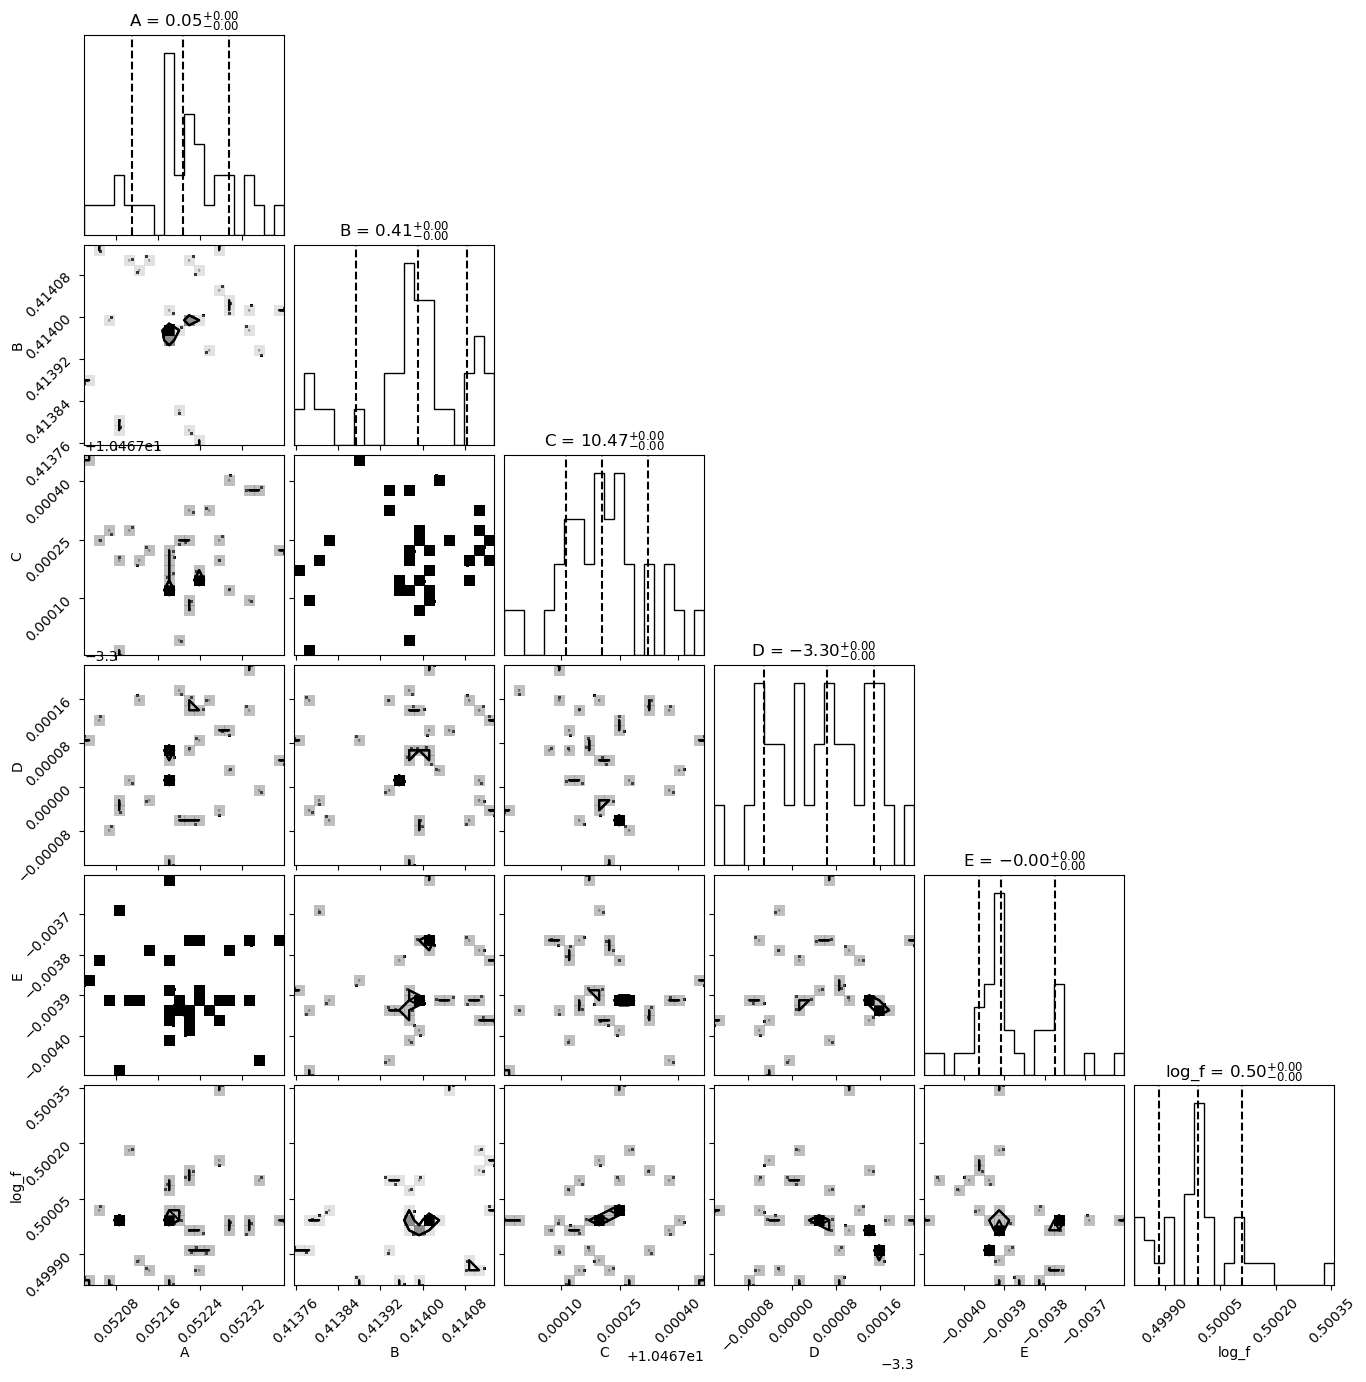

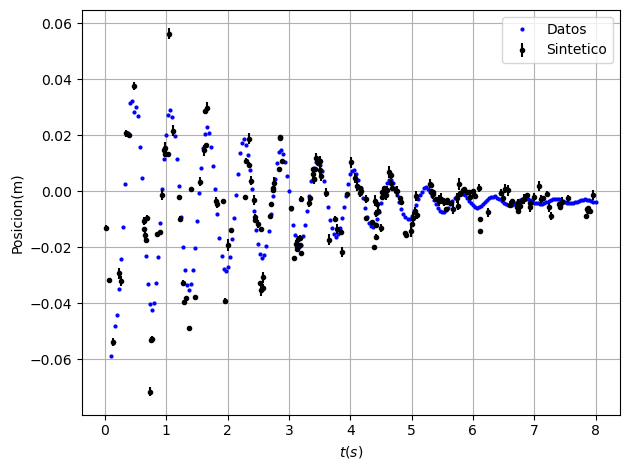

[ 5.64505433e-02  3.86718344e-01  9.60927046e+00 -1.62320938e+00
 -2.69462261e-03]


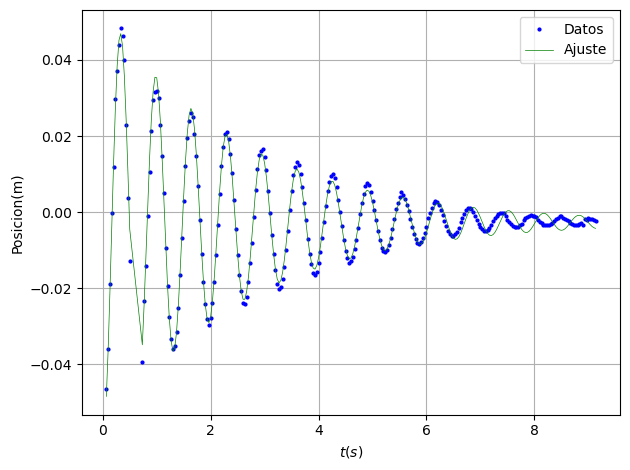

[ 0.05905883  0.40396188  9.61698414 -1.64480462]


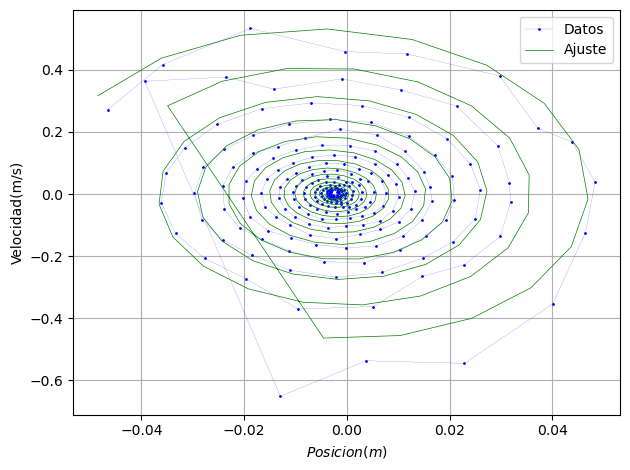

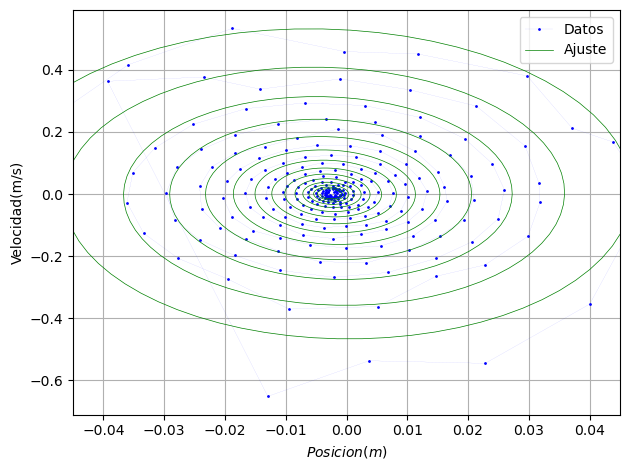

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1349.10it/s]


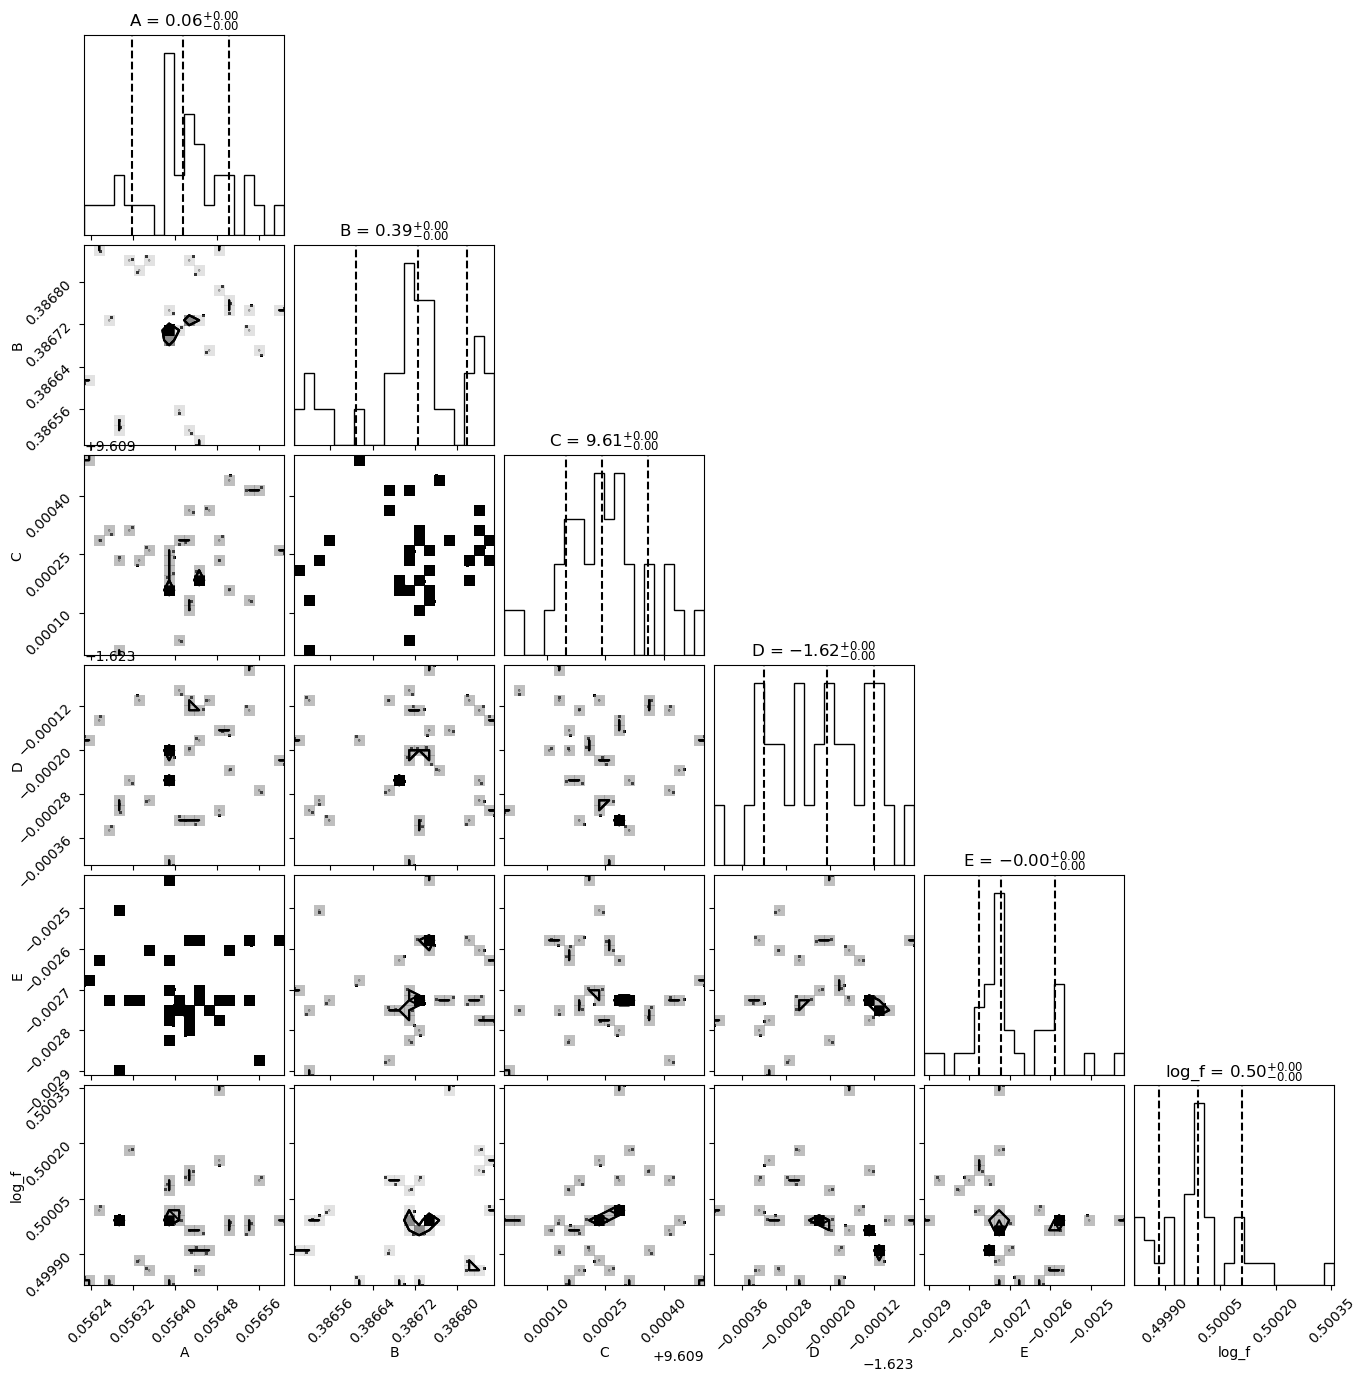

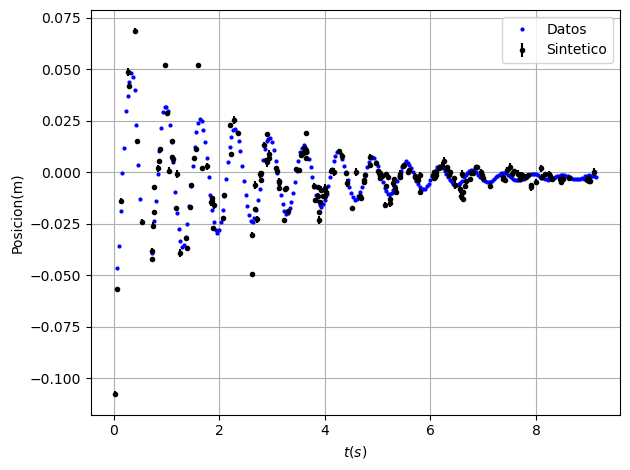

[ 5.20914470e-02  3.82700894e-01  9.62157549e+00 -1.91330391e+00
 -3.31260077e-03]


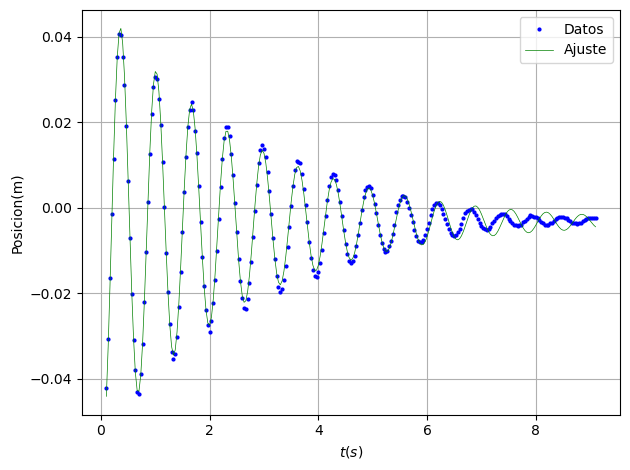

[ 0.05074857  0.37976784  9.63011983 -1.93420348]


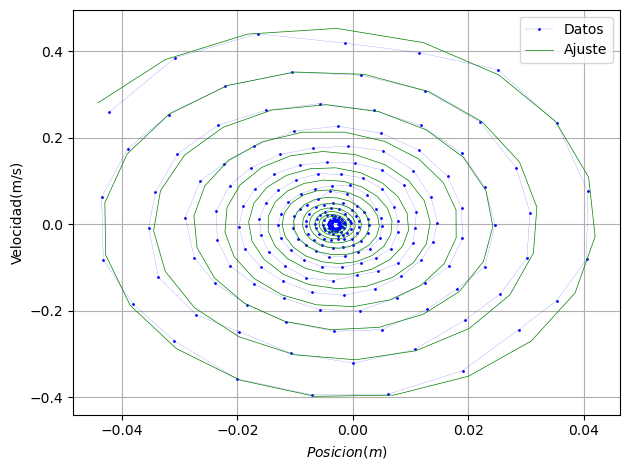

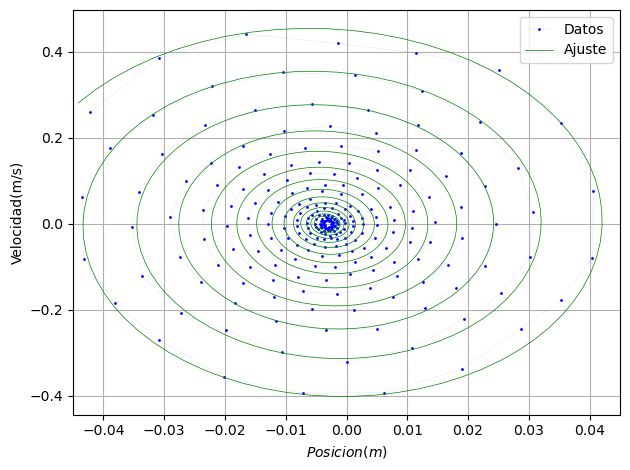

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1276.08it/s]


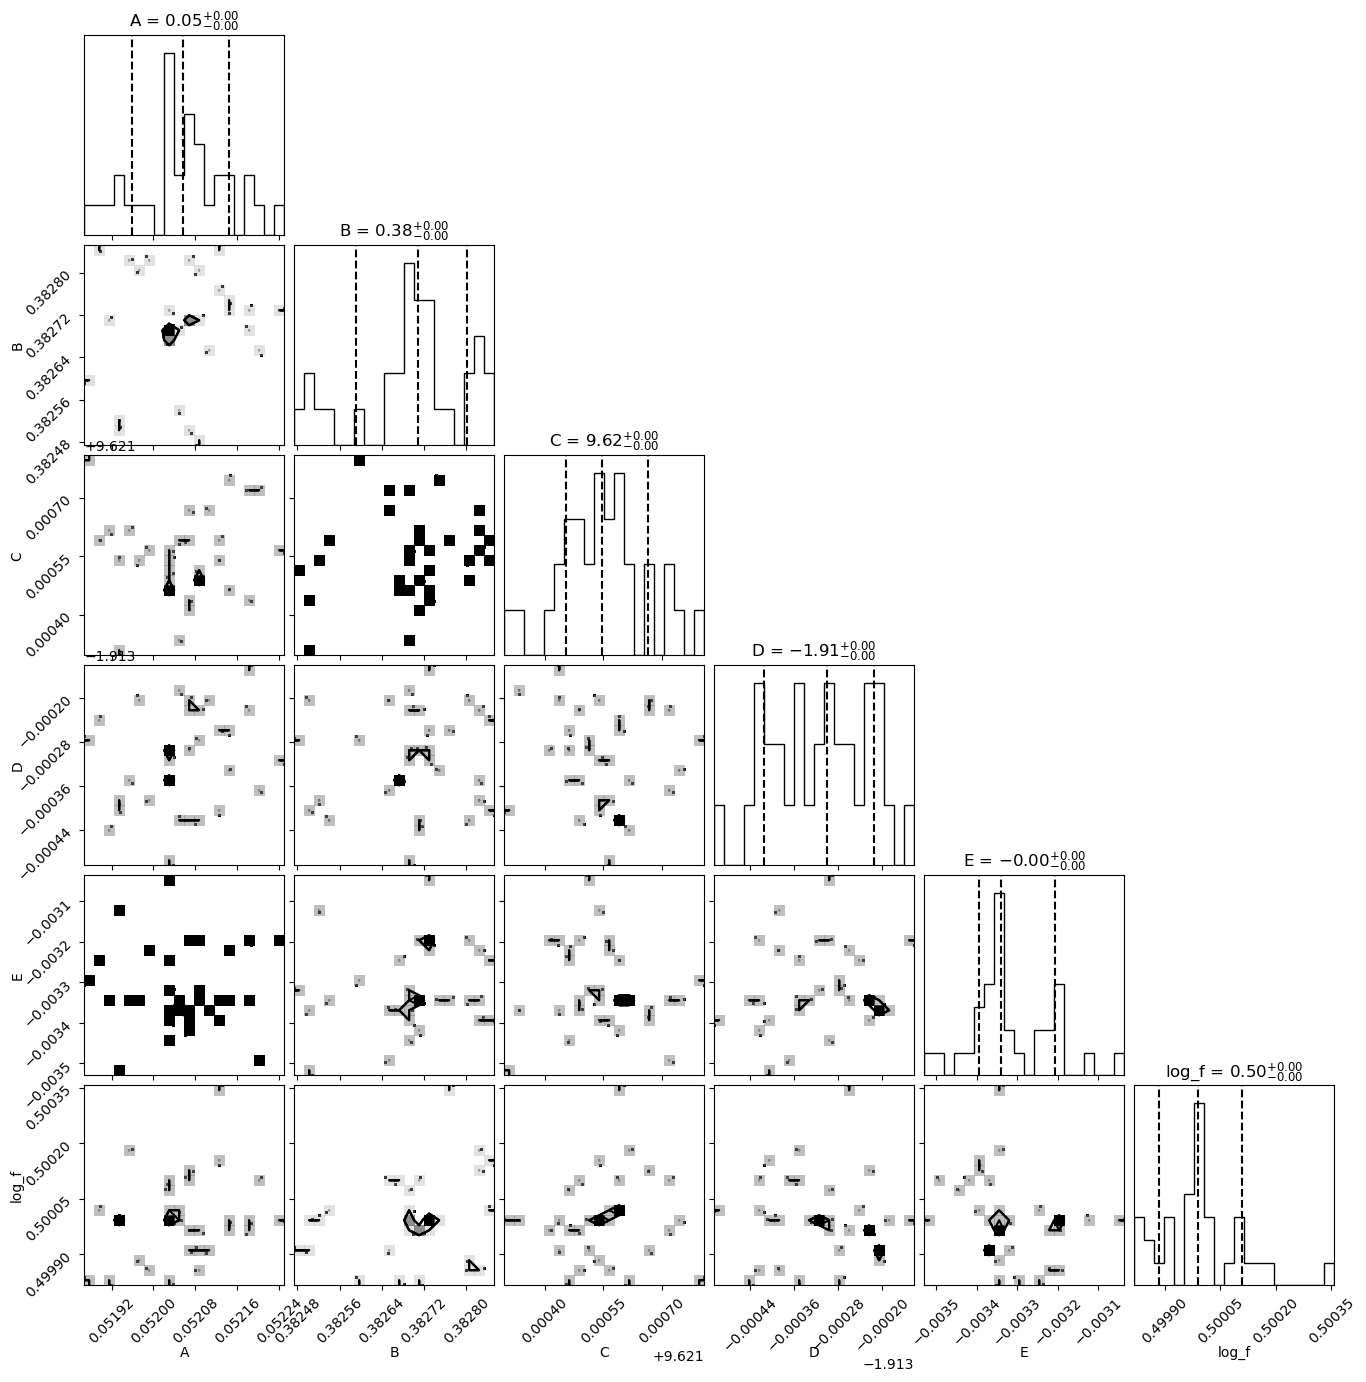

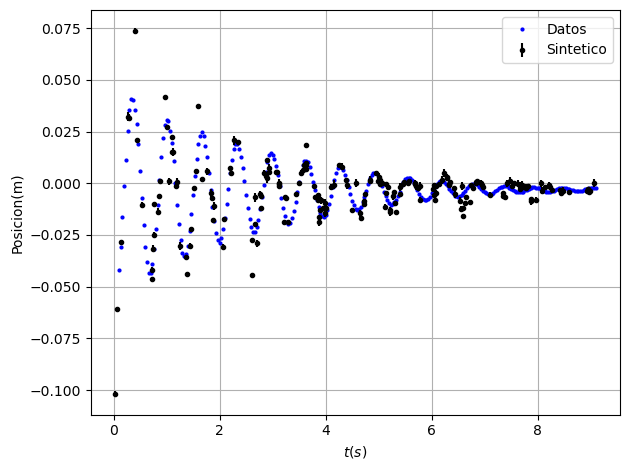

[ 3.54479766e-02  3.62607931e-01  8.91463241e+00 -1.24226618e+00
 -3.35971670e-03]


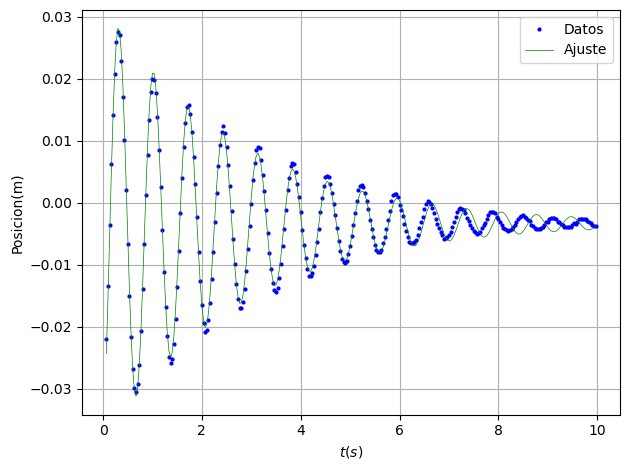

[ 0.03450744  0.35840341  8.92091409 -1.25866935]


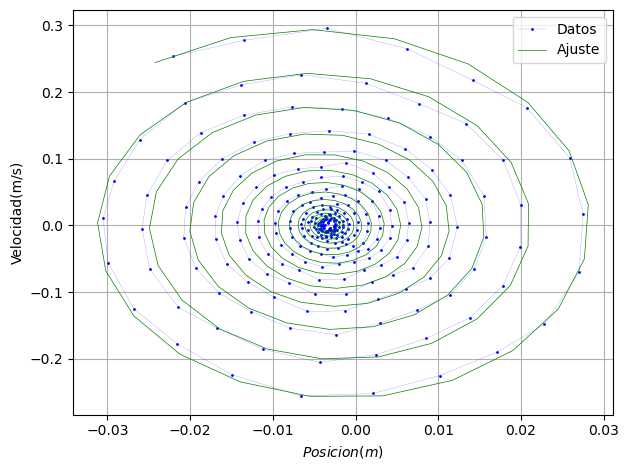

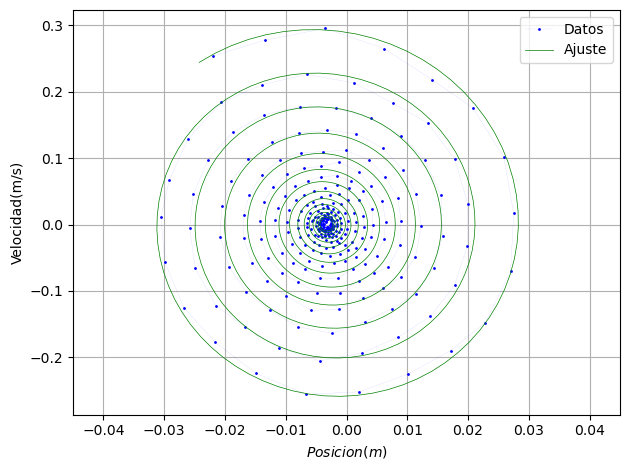

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1332.41it/s]


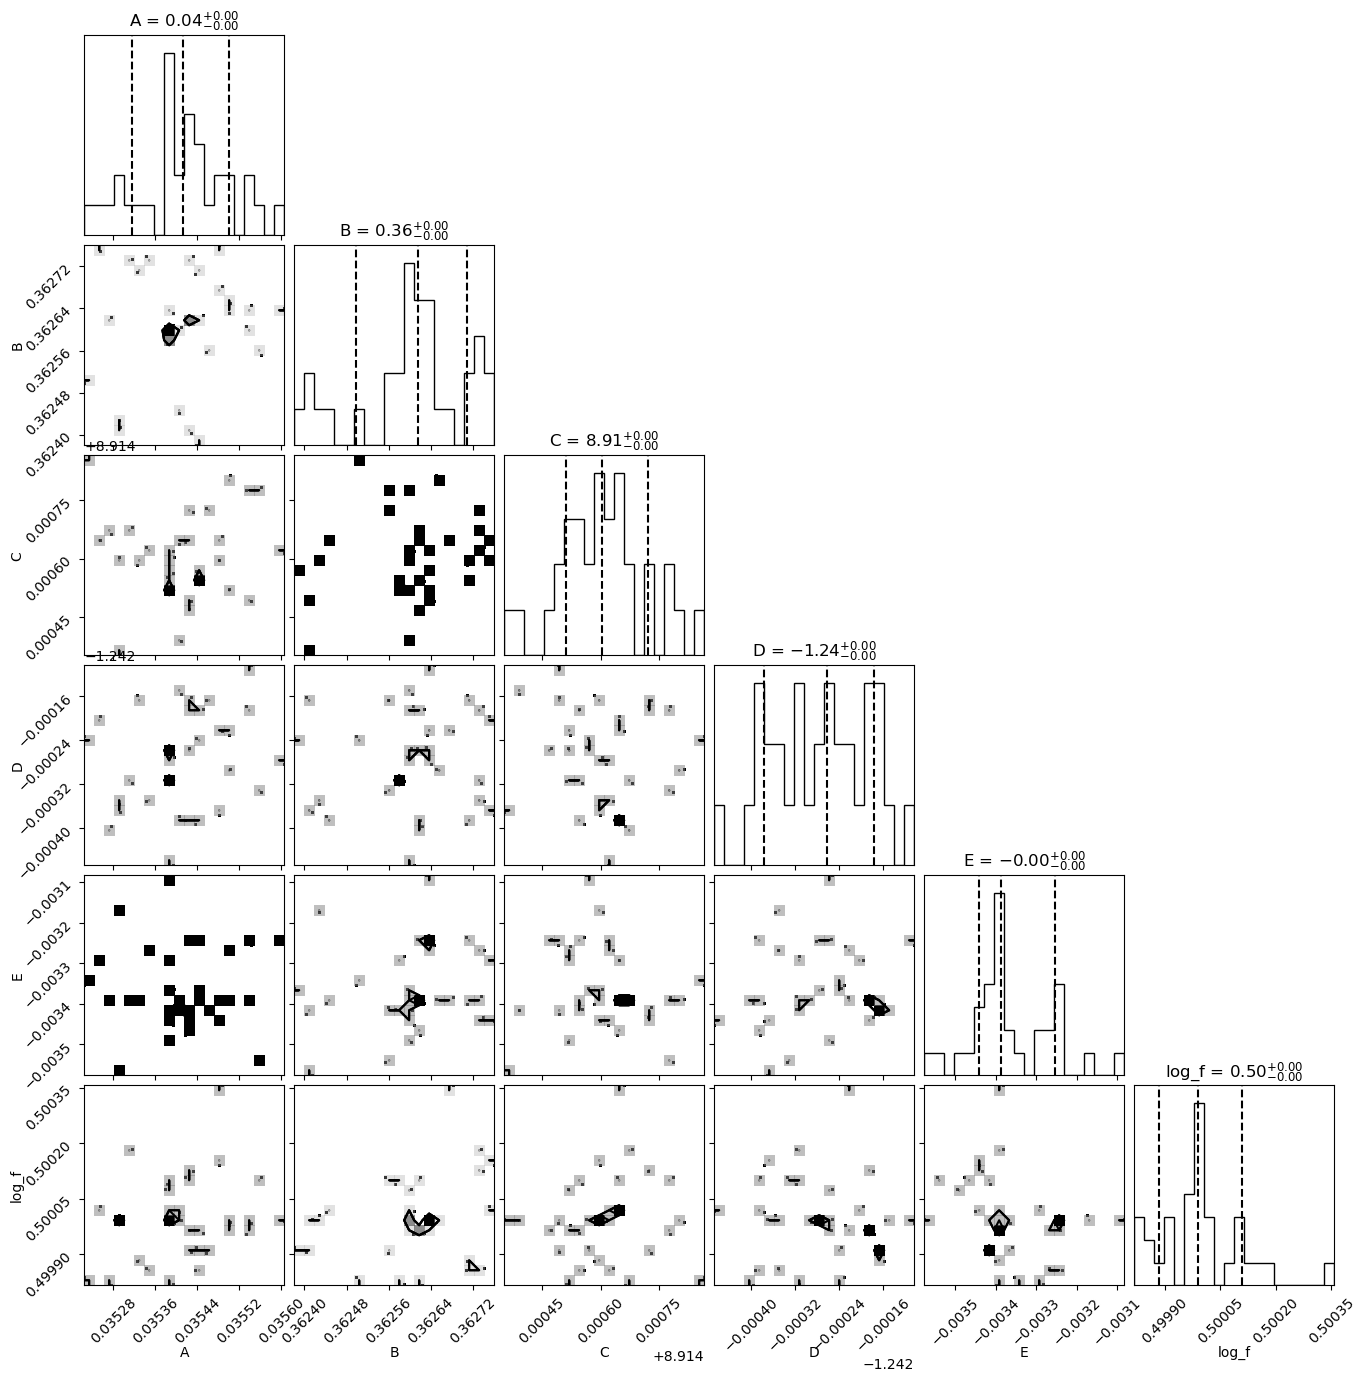

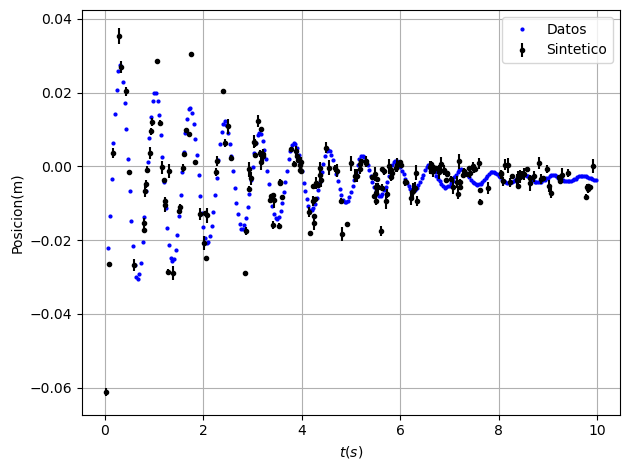

[ 4.01576371e-02  3.64661752e-01  8.93364330e+00 -6.45185262e+00
 -4.44995624e-03]


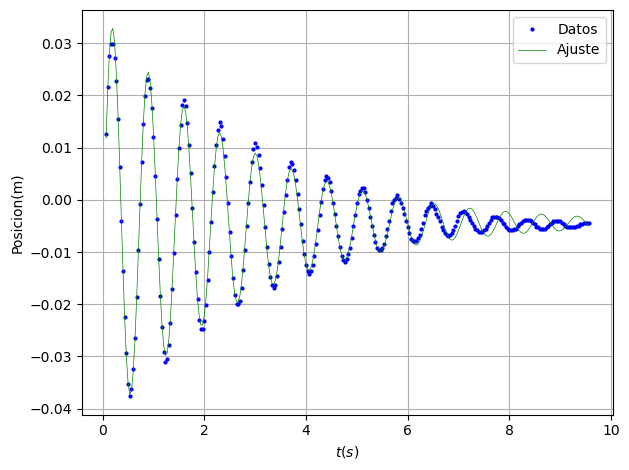

[ 0.0390822   0.3606307   8.93246012 -0.1655418 ]


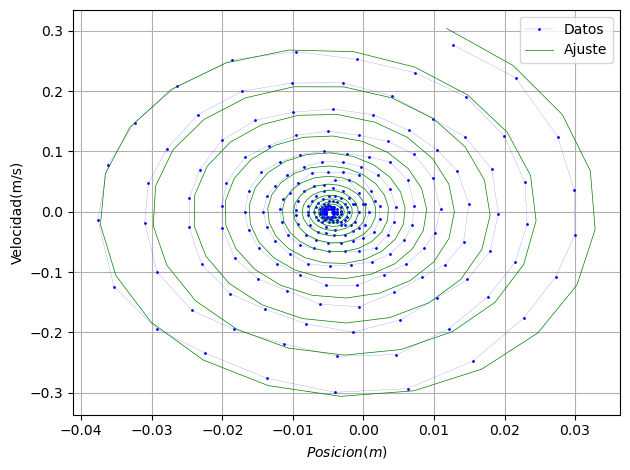

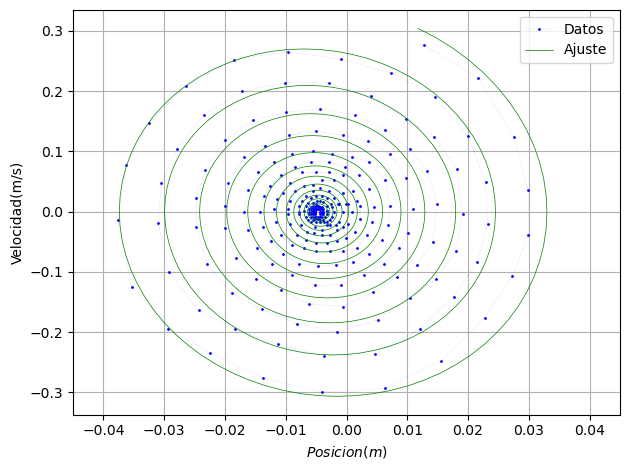

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1321.96it/s]


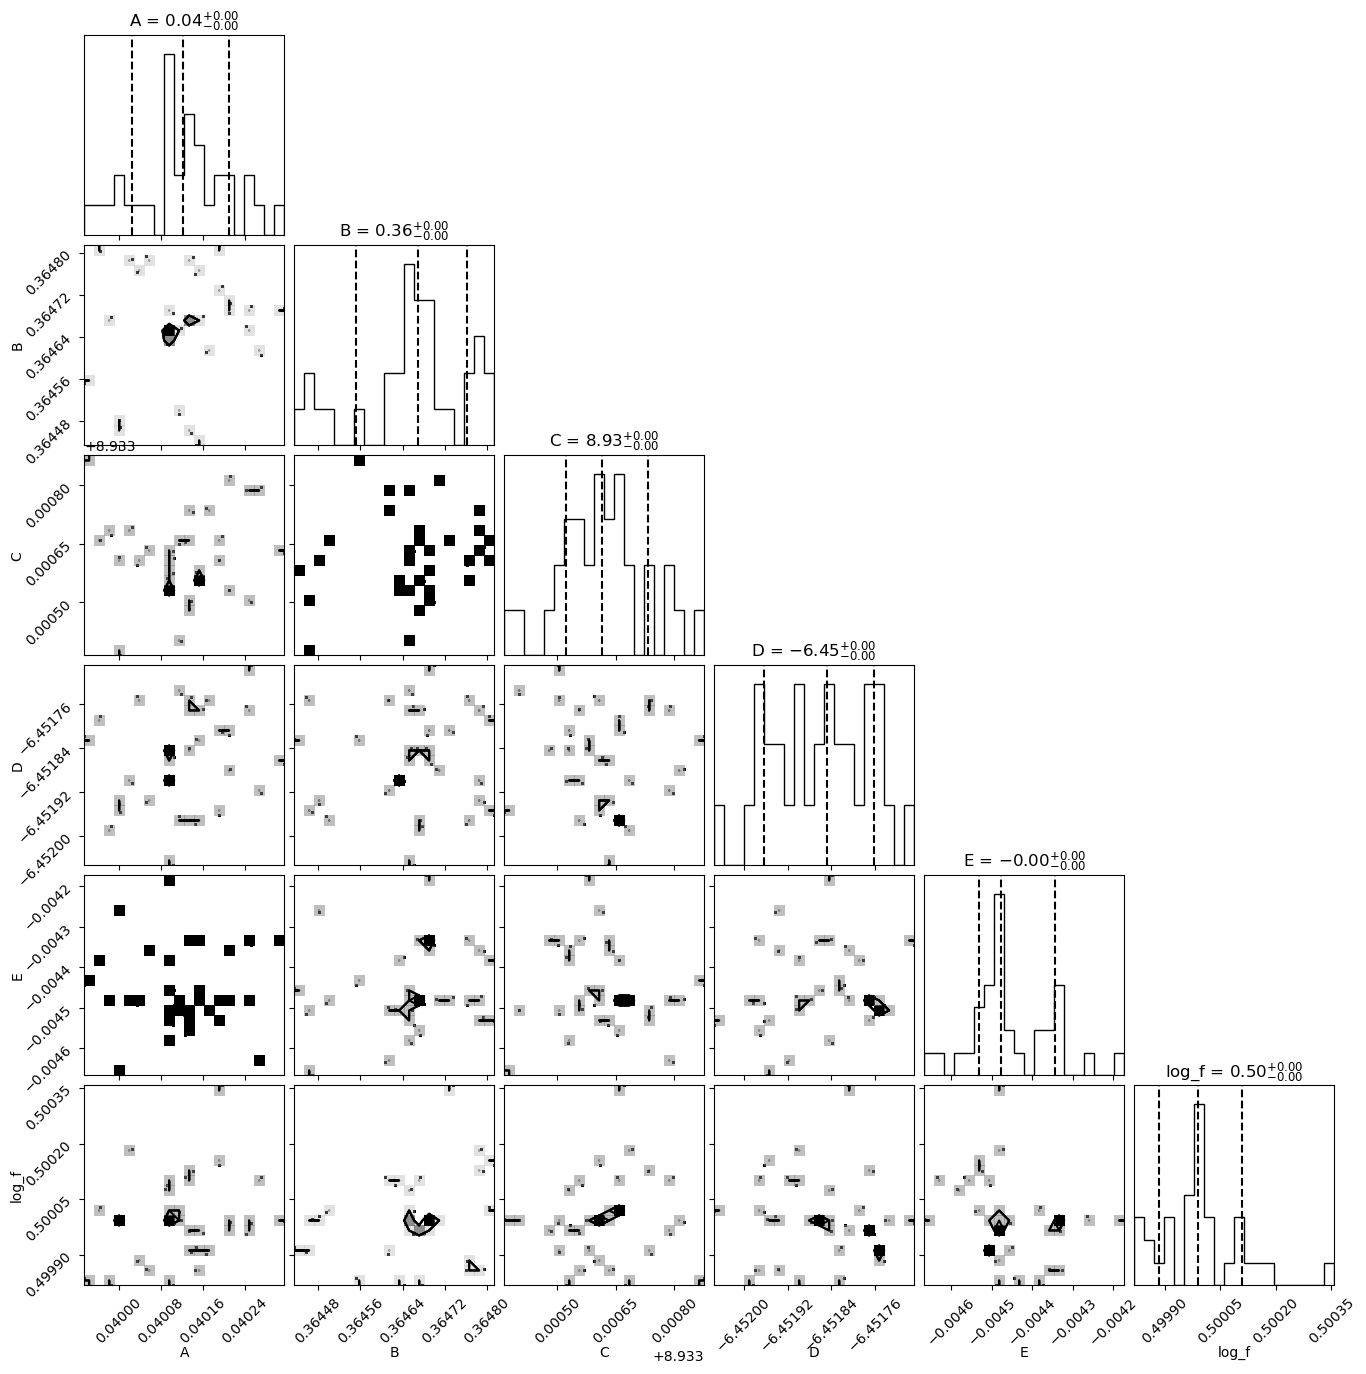

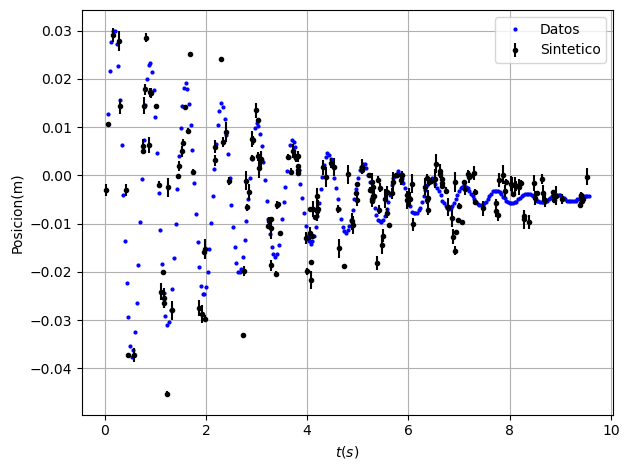

[ 2.42069557e-02  4.18008495e-01  8.45920423e+00 -8.11810162e+00
 -4.00724428e-03]


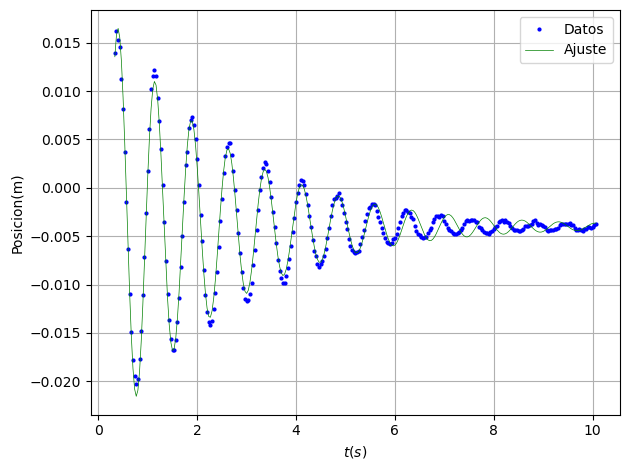

[ 0.02371505  0.41554068  8.45491572 -1.82486441]


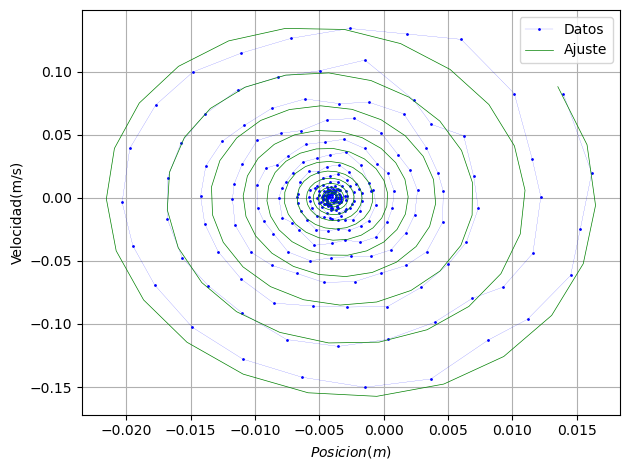

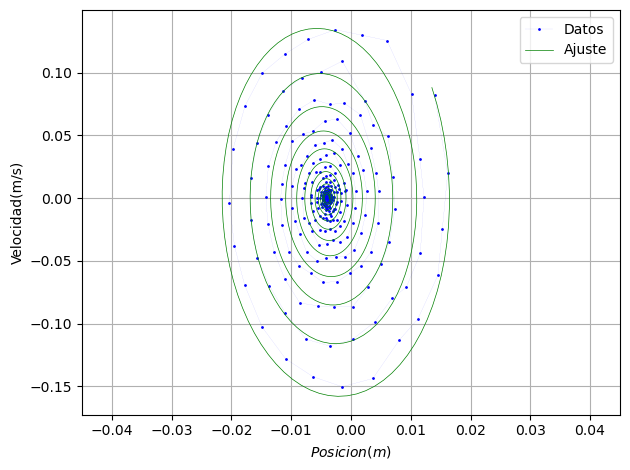

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1314.50it/s]


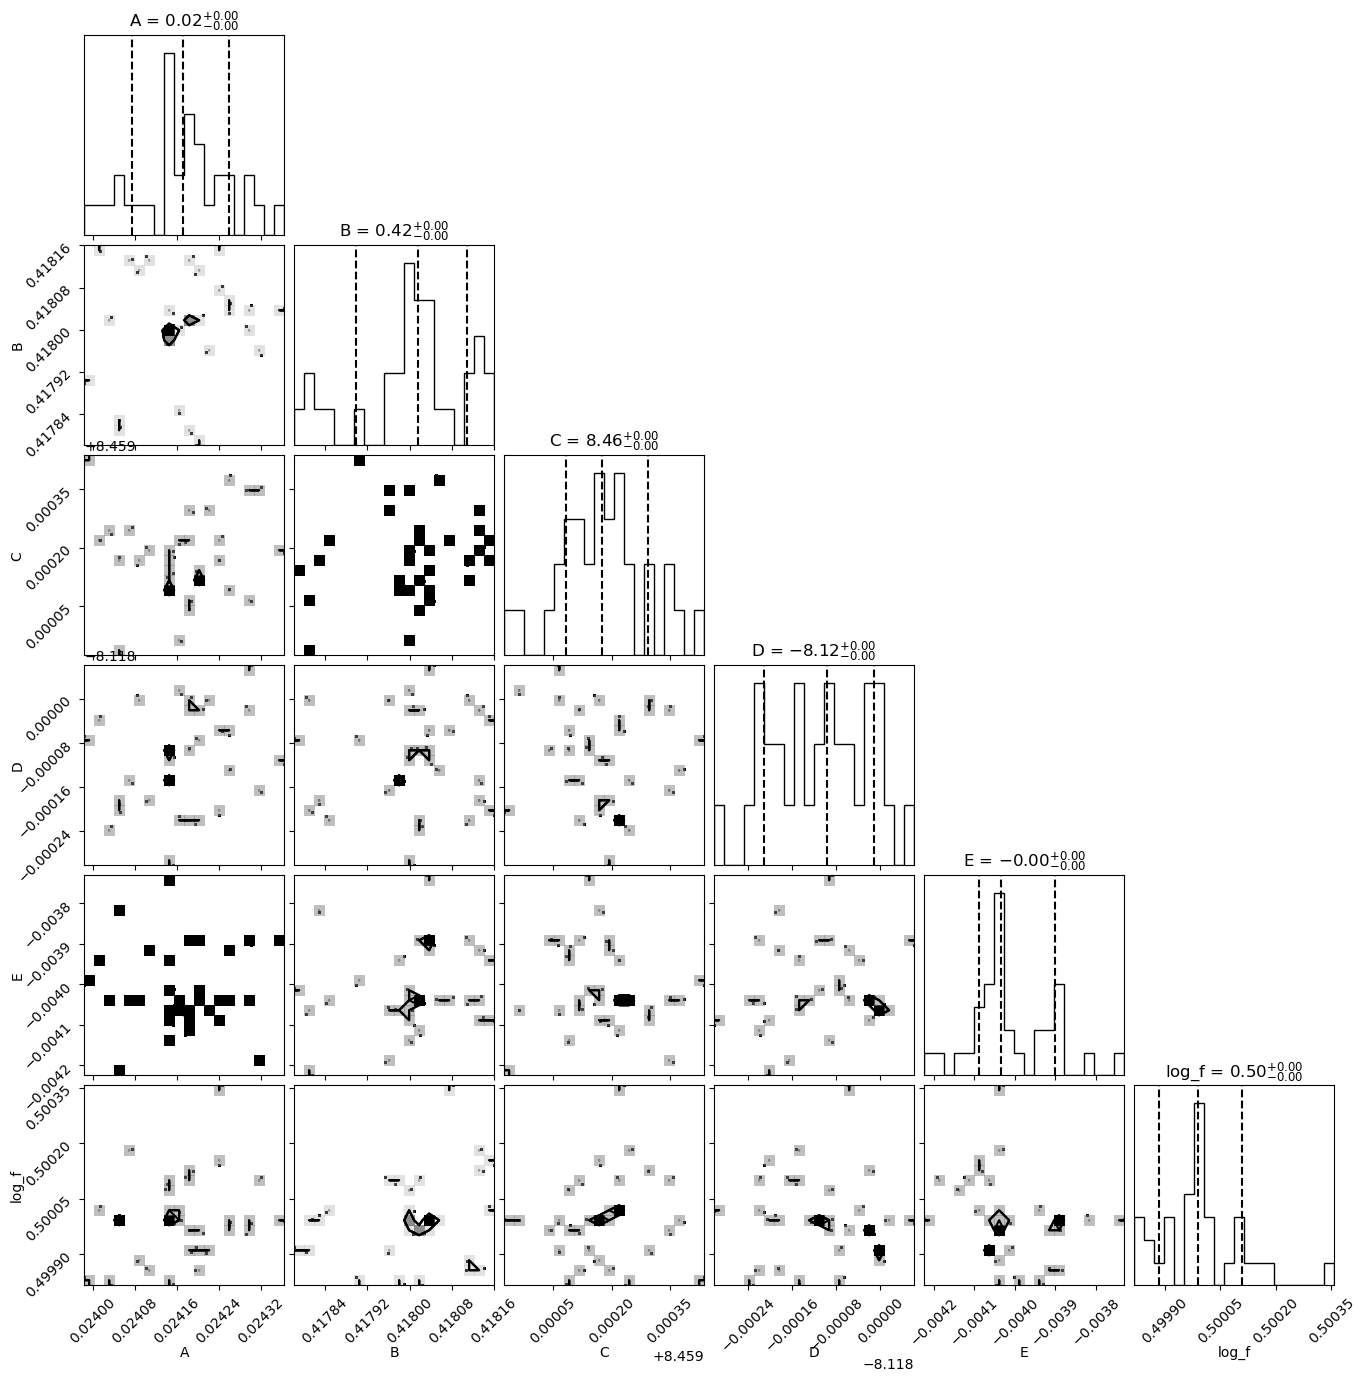

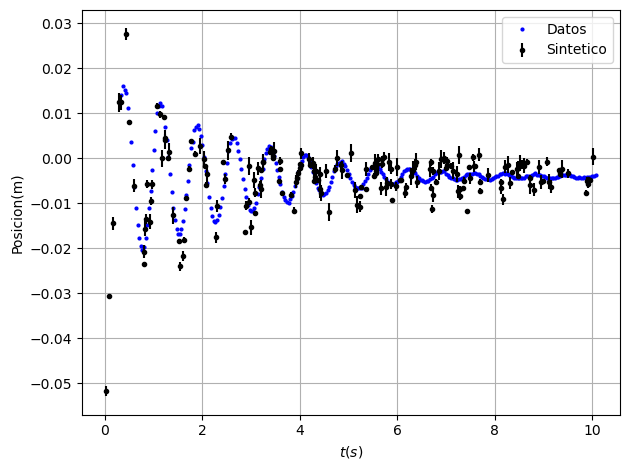

[-3.88368303e-02  3.68925486e-01  8.41405340e+00 -5.51951076e+00
 -2.57727844e-03]


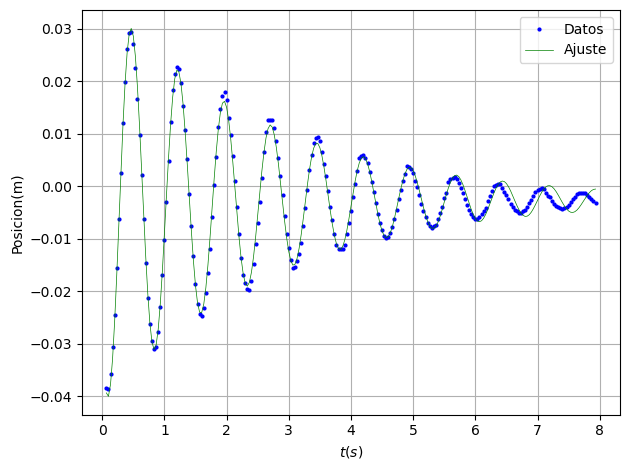

[ 0.03836473  0.36895667  8.41844471 -2.38585938]


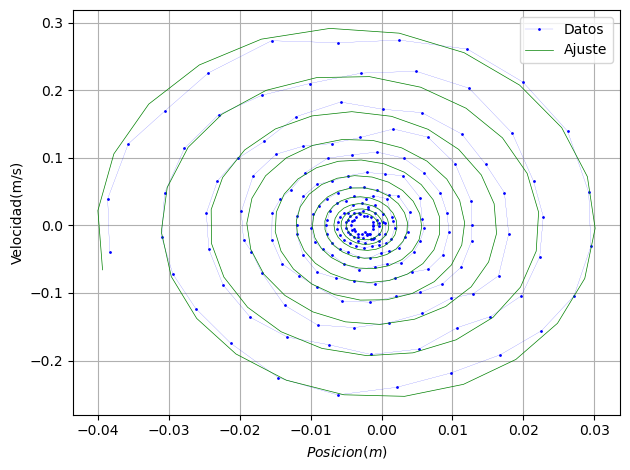

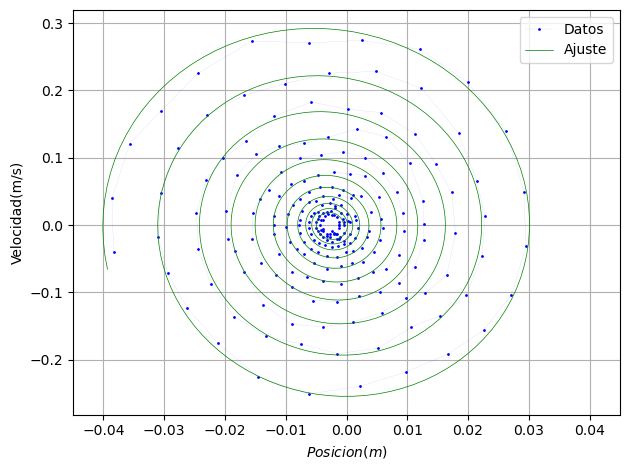

  0%|                                                | 0/2000 [00:00<?, ?it/s]/home/UANDES/fa.orjuela/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|███████████████████████████████████| 2000/2000 [00:01<00:00, 1374.00it/s]


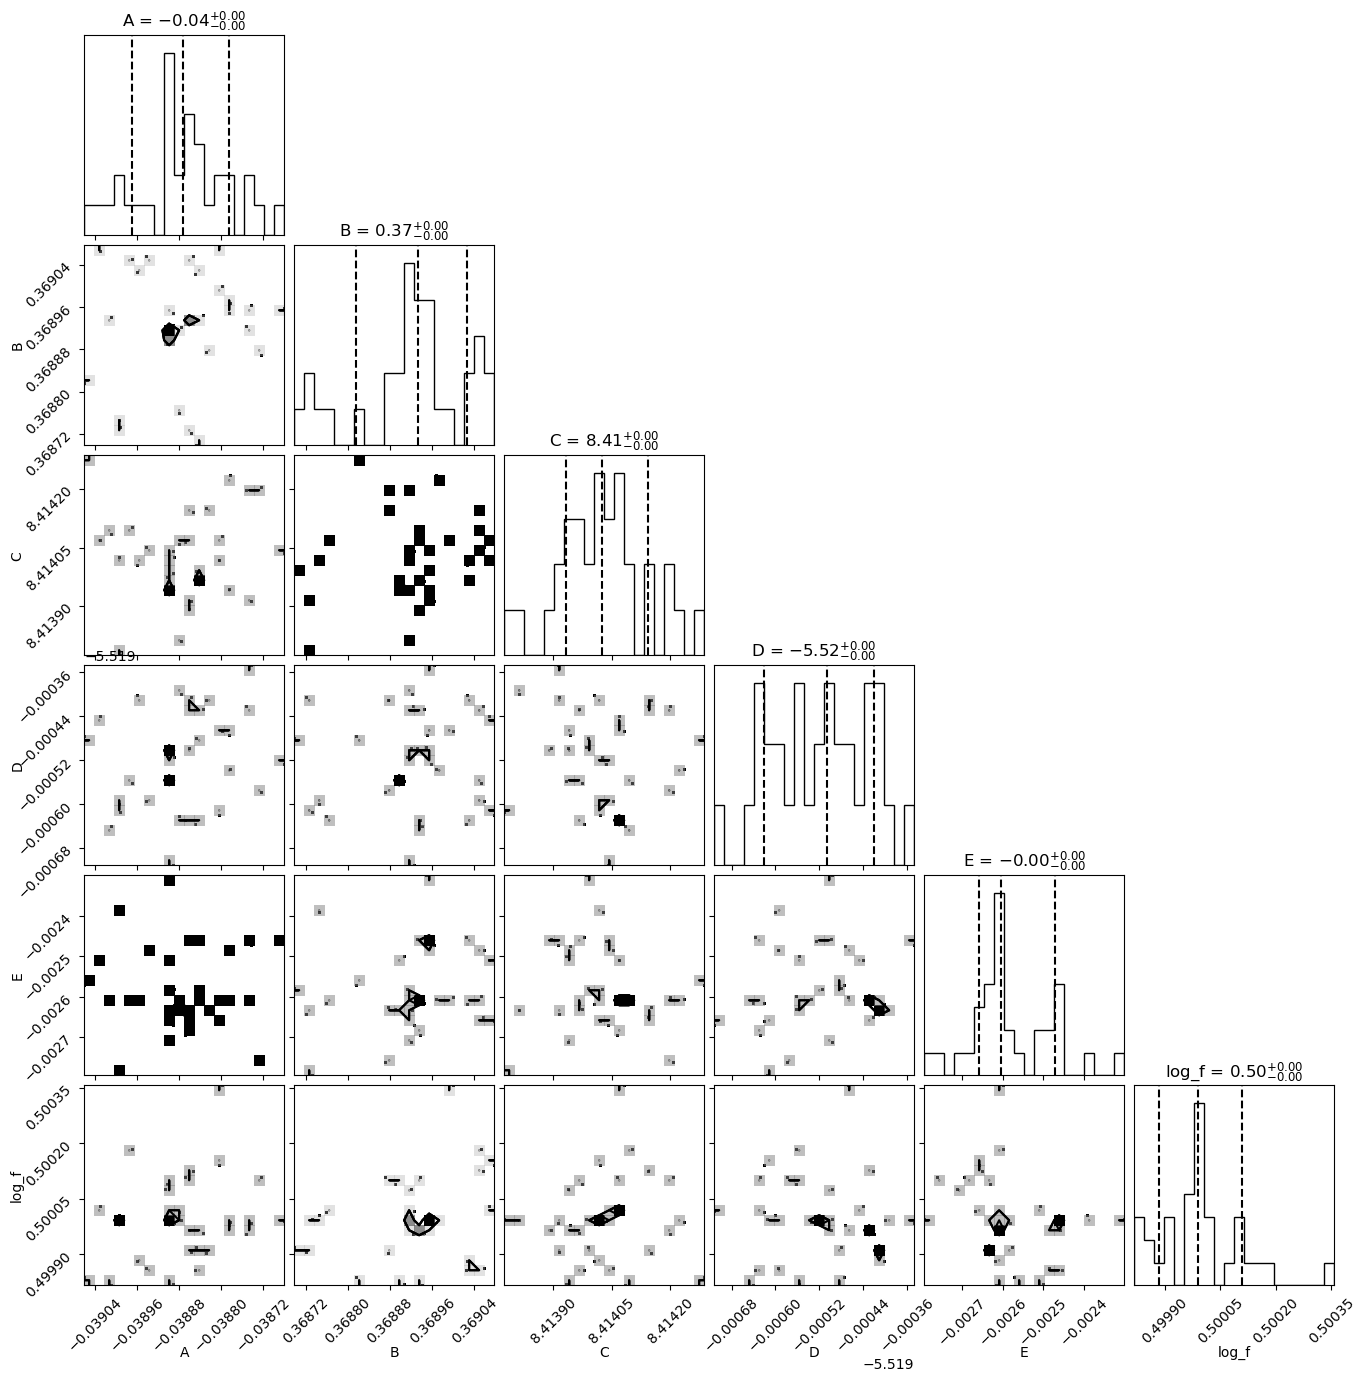

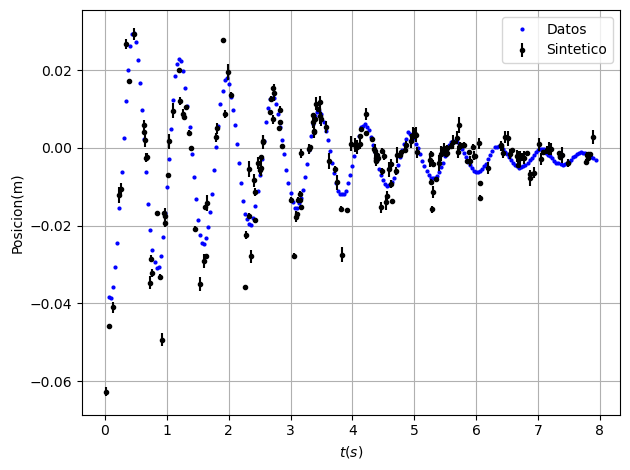

In [4]:
for fil,hor in zip(files,hora):
    #Se lee el archivo de origen
    data = pd.read_csv(fil, sep=" ", header=None)
    data.columns = ["a", "b", "c", "d"]
    # Se convierten los archivos del data a valores
    ds = data.values
    #print(ds)
    
    # Se leen los datos, para ello se crean unos arreglos con append que contienen los datos ahora
    
    OriginalX = []
    OriginalY = []
    OriginalZ = []

    for i in range(len(ds)):
        OriginalX.append(ds[i][0])
        OriginalY.append(ds[i][1])
        OriginalZ.append(ds[i][2])
    #print(OriginalX)
    #print(OriginalY)
    
    ### Ahora se va a realizar el ajuste correspondiente, para ello se va a crear una función
    ### con parámetros que contengan los valores del ajuste
    
    ## Definimos la variables xfit, yfit para la posterior grafica
    xfit = OriginalX 
    yfit = OriginalY
    zfit = OriginalZ
    #print(xfit)
    #print(yfit)
    # Definimos la funcion 
    def funcionseno(x, a, b, c, d, e):
        return a* exp(-b*x) * np.sin(c * x + d) + e

    #print(xfit)
    #print(yfit)

    popt, pcov = optimize.curve_fit(funcionseno, xfit, yfit, p0=[1,1,1,1,1], maxfev=5000)
    print(popt)
    #print(pcov)
    
    #Con los diferentes parámetros obtenidos se puede realizar el respectivo ajuste, para ello creamos 
    #los nuevos valores de y a partir de la expresión que sugerimos para el ajuste
    
    A = np.zeros(len(xfit)) + popt[0]
    B = np.zeros(len(xfit)) + popt[1]
    C = np.zeros(len(xfit)) + popt[2]
    D = np.zeros(len(xfit)) + popt[3]
    E = np.zeros(len(xfit)) + popt[4]
    #print(A)
    
    # Se define de nuevo los nuevos valores de Y , yajuste, donde xfit son los valores originales de los datos
    yajuste = A * exp(-B*xfit) * np.sin(C * xfit + D) + E
    #print(yajuste)




    #se grafican los datos de posicion y vs tiempo x
    data.plot(x='a',y='b',color='blue',marker='o',linewidth=0,markersize=2.0,label=hor)
    # se grafica el ajuste
    plt.plot(xfit, yajuste,color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'Posicion(m)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+".pdf",dpi=600)
    plt.show()



    
    ### Ahora se va a trazar la línea teórica para el espacio de fases teniendo en cuenta 
    #los parámetros obtenidos anteriormente, recordando la ecuación de velocidad para el amortiguado
    # en términos del párametro del tiempo
    
    ## Definimos la variables xfit, yfit para la posterior grafica
    xfit = OriginalX
    yfit = OriginalY
    zfit = OriginalZ
    #print(xfit)
    #print(yfit)
    # Definimos la funcion 
    def vel(x, k, l, m, n):
        return k* exp(-l*x) *(m*np.cos(m * x + n)-l * np.sin(m * x + n))

    #print(xfit)
    #print(yfit)

    poptd, pcovd = optimize.curve_fit(vel, xfit, zfit, p0=[1,1,1,1], maxfev=5000)
    print(poptd)
    #print(pcovd)
    
    #Con los diferentes parámetros obtenidos se puede realizar el respectivo ajuste, para ello creamos 
    #los nuevos valores de y a partir de la expresión que sugerimos para el ajuste
    
    K = np.zeros(len(xfit)) + poptd[0]
    L = np.zeros(len(xfit)) + poptd[1]
    M = np.zeros(len(xfit)) + poptd[2]
    N = np.zeros(len(xfit)) + poptd[3]
    #print(A)
    
    
    
    
    
    # Definimos la funcion de la velocidad
    Vel = K* exp(-L*xfit) *(M*np.cos(M * xfit + N)- L * np.sin(M * xfit + N))
    #print(Vel)

    #Al graficar tendremos la misma cantidad de puntos para la nueva gráfica, para ello se generan un nuevo 
    ##arreglo de número empezando por el primer valor y el último valor teniendo en cuenta el ajuste
    
    
    #se grafican los datos de posicion y vs velocidad v experimental
    data.plot(x='b',y='c',color='blue', label=hor,marker='.',markersize=2.0,linewidth=0.1)
    #se grafican los datos de posicion y Yajuste vs velocidad V del ajuste con Vel, dado que 
    # ajustamos los datos tanto de posición como de velocidad
    plt.plot(yajuste, Vel, color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$Posicion(m)$')
    plt.ylabel(r'Velocidad(m/s)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+"_Phase"+".pdf",dpi=600)
    plt.show()
    
    # Definimos el tiempo entre el primer valor y el ultimo valor del tiempo Original y damos 
    # pasos de 1000, se llenan 1000 datos
    time = np.linspace(OriginalX[0], OriginalX[i],1000)
    #print(time)
    
    Ad = np.zeros(len(time)) + popt[0]
    Bd = np.zeros(len(time)) + popt[1]
    Cd = np.zeros(len(time)) + popt[2]
    Dd = np.zeros(len(time)) + popt[3]
    Ed = np.zeros(len(time)) + popt[4]

    
    # Posición con más datos
    Position = Ad * exp(-Bd * time) * np.sin(Cd * time + Dd) + Ed
    #print(Position)
    
    Kd = np.zeros(len(time)) + poptd[0]
    Ld = np.zeros(len(time)) + poptd[1]
    Md = np.zeros(len(time)) + poptd[2]
    Nd = np.zeros(len(time)) + poptd[3]
    #print(A)
    
    # Velocidad con más datos
    Velocity = Kd* exp(-Ld*time) *(Md*np.cos(Md * time + Nd)- Ld * np.sin(Md * time + Nd))
    #print(Velocity)

    
    #se grafican los datos de posicion y vs velocidad v experimental
    data.plot(x='b',y='c',color='blue', label=hor,marker='.',markersize=2.0,linewidth=0.05,ls='--')
    #se grafican los datos de posicion y Yajuste vs velocidad V del ajuste con Vel, dado que 
    # ajustamos los datos tanto de posición como de velocidad
    plt.plot(Position, Velocity, color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$Posicion(m)$')
    plt.ylabel(r'Velocidad(m/s)')
    plt.xlim(-0.045,0.045)
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+"_PhaseHD"+".pdf",dpi=600)
    plt.show()
    
    
    ###################################################################################
    #EMCEE
    #Generamos semilla aleatoria
    np.random.seed(123)
    #marque los verdaderos parámetros ( en este caso del ajuste de lmfit)
    AA=popt[0]
    BB=popt[1]
    CC=popt[2]
    DD=popt[3]
    EE=popt[4]
    f_true = 0.5
 

    minv= 0
    maxv= np.max(ds[i][0])
    #print(minv)
    #print(maxv)
    
    # Generamos datos sinteticos del modelo donde ysim y x sim son datos simulados
    N = 200
    xsim = np.sort(maxv * np.random.rand(N))
    #print(xsim)
    yerr = 0.0001 + 0.002 * np.random.rand(N)
    #print(yerr)
    ysim =  AA * exp(-BB*xsim) * np.sin(CC * xsim + DD) + EE
    #print(ysim)
    ysim += np.abs(f_true * ysim) * np.random.randn(N)
    ysim += yerr * np.random.randn(N)
    
    
####################   
####################   
####################   
        
    """
    As = np.vander(xsim, 5)
    #print(As.shape)
    Cs = np.diag(yerr * yerr)
    #print(Cs.shape)
    ATA = np.dot(As.T, As / (yerr**2)[:, None])
    #print(ATA.shape)
    cov = np.linalg.inv(ATA)
    #print(cov)
    w = np.linalg.solve(ATA, np.dot(As.T, ysim / yerr**2))
    print("Least-squares estimates:")
    print("AA = {0:.3e} ± {1:.3e}".format(w[0], np.sqrt(cov[0, 0])))
    print("BB = {0:.3e} ± {1:.3e}".format(w[1], np.sqrt(cov[1, 1])))
    print("CC = {0:.3e} ± {1:.3e}".format(w[2], np.sqrt(cov[2, 2])))
    print("DD = {0:.3e} ± {1:.3e}".format(w[3], np.sqrt(cov[3, 3])))
    print("EE = {0:.3e} ± {1:.3e}".format(w[4], np.sqrt(cov[4, 4])))
    
    Aco=np.sqrt(cov[0, 0])
    Bco=np.sqrt(cov[1, 1])
    Cco=np.sqrt(cov[2, 2])
    Dco=np.sqrt(cov[3, 3])
    Eco=np.sqrt(cov[4, 4])
    
    def log_likelihood(theta, xsim, ysim, yerr):
        Aco, Bco, Cco, Dco, Eco, log_f = theta
        model = Aco * exp(-Bco*xsim) * np.sin(Cco * xsim + Dco) + Eco
        sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
        return -0.5 * np.sum((ysim - model) ** 2 / sigma2 + np.log(sigma2))
    
    np.random.seed(42)
    nll = lambda *args: -log_likelihood(*args)
    initial = np.array([Aco, Bco, Cco, Dco, Eco, np.log(f_true)]) + 0.1 * np.random.randn(6)
    soln = minimize(nll, initial, args=(xsim, ysim, yerr))
    Aco_ml, Bco_ml,Cco_ml,Dco_ml,Eco_ml, log_f_ml = soln.x

    print("Maximum likelihood estimates:")
    print("AA = {0:.3e}".format(Aco_ml))
    print("BB = {0:.3e}".format(Bco_ml))
    print("CC= {0:.3e}".format(Cco_ml))
    print("DD= {0:.3e}".format(Dco_ml))
    print("EE= {0:.3e}".format(Eco_ml))
    print("f = {0:.3e}".format(np.exp(log_f_ml)))
    """

    
    
####SE DEFINE LA PRIOR

    
    def log_prior(theta):
        AA, BB, CC, DC, EE, log_f = theta
        if -5 < Aco < 5 and -5 < Bco < 5 and -5< Cco < 5 and 5 < Dco < 5 and -5< Eco < 5 and -10.0 < log_f < 1.0:
            return 0.0
        return -np.inf

    #SE DEFINE LA LIKELIHOOD
    
    def log_probability(theta, xsim, ysim, yerr):
        prior = log_prior(theta)
        if not np.isfinite(prior):
            return -np.inf
        y_model = AA * exp(-BB*xsim) * np.sin(CC * xsim + DD) + EE
        chi_squared = np.sum(((y - y_model) / yerr) ** 2)
        log_likelihood = -0.5 * chi_squared
        return prior + log_likelihood   
    
    
    
    
####Valores iniciales para los parámetros del modelo
    initial_guess = [AA, BB, CC, DD,EE,f_true]
    
####SE DEFINE LA MUESTRA 
    nwalkers = 32
    ndim = len(initial_guess)
    
####Genera una muestra inicial aleatoria de parámetros
    pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)
    
####Crea el objeto sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xsim, ysim, yerr))

####Ejecuta el muestreo MCMC
    n_steps = 2000
    sampler.run_mcmc(pos, n_steps, progress=True)
    
####Obtén las muestras planas
    samples = sampler.get_chain()
    flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

    
    
    labels = ["A", "B", "C", "D","E","log_f"]
    fig = corner.corner(
    flat_samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
    show_titles=True);
    
    #se grafican los datos de posicion y vs tiempo x Reales
    data.plot(x='a',y='b',color='blue',marker='o',linewidth=0,markersize=2.0,label=hor)
    # se grafica el ajuste de lmfit
    #plt.plot(xfit, yajuste,color='green',linewidth=0.5, label='Ajuste')
    # se grafican los datos sinteticos con error
    plt.errorbar(xsim, ysim, yerr=yerr, fmt=".k",capsize=0,label='Sintetico')  
    # se grafica el ajuste de EMCEE
    plt.xlabel(r'$t (s)$')
    plt.ylabel(r'Posicion(m)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+".pdf",dpi=600)
    plt.show()
    
    
    




In [ ]:
    time = np.linspace(OriginalX[0], OriginalX[i],500)
    #print(time)
    
    Ad = np.zeros(len(time)) + popt[0]
    Bd = np.zeros(len(time)) + popt[1]
    Cd = np.zeros(len(time)) + popt[2]
    Dd = np.zeros(len(time)) + popt[3]
    Ed = np.zeros(len(time)) + popt[4]

    
    # Posición con más datos
    Position = Ad * exp(-Bd * time) * np.sin(Cd * time + Dd) + Ed
    #print(Position)
    
    Kd = np.zeros(len(time)) + poptd[0]
    Ld = np.zeros(len(time)) + poptd[1]
    Md = np.zeros(len(time)) + poptd[2]
    Nd = np.zeros(len(time)) + poptd[3]
    #print(A)
    
    # Velocidad con más datos
    Velocity = Kd* exp(-Ld*time) *(Md*np.cos(Md * time + Nd)- Ld * np.sin(Md * time + Nd))
    #print(Velocity)

    
    #se grafican los datos de posicion y vs velocidad v experimental
    data.plot(x='b',y='c',color='blue', label=hor,marker='.',markersize=2.0,linewidth=0.1)
    #se grafican los datos de posicion y Yajuste vs velocidad V del ajuste con Vel, dado que 
    # ajustamos los datos tanto de posición como de velocidad
    plt.plot(Position, Velocity, color='green',linewidth=0.5, label='Ajuste')
    plt.xlabel(r'$Posicion(m)$')
    plt.ylabel(r'Velocidad(m/s)')
    plt.legend(loc='upper right')
    #plt.title("Video "+str(fil)[1:-4])
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("./Figures/"+str(fil)[:-4]+"_PhaseHD"+".pdf",dpi=600)
    plt.show()